In [14]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec



from scipy.interpolate import interp1d as spline

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [15]:
pockels = [0, 10 ,20, 30, 40, 50, 60, 70, 80, 90, 100]
mw = [4, 13.7, 28, 42.5, 57, 73, 88, 103, 119, 136, 154]
mw_v_pockels = spline(pockels,mw)

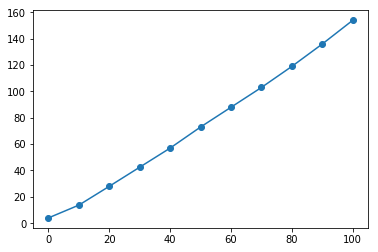

In [16]:
f,ax = plt.subplots()
ax.scatter(pockels,mw)
x = np.linspace(0,100)
ax.plot(x,mw_v_pockels(x))

In [17]:
rare = ['4139265.3','4139265.4','4139265.5','4222168.1']
frequent = ['4222153.1', '4222153.2','4222153.3','4222174.1','4222154.1']
fd = ['4222157.4','4222169.1','4222169.2','4222169.4']

In [18]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
# tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging' #|FreqMorph_Decision|FreqMorph_Timeout|TwoTower_noTimeout|TwoTower_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]
regions = 'CA2|CA3|DG'
df = df[~df['ImagingRegion'].str.contains(regions,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [27]:
mouse = '4222153.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1727,4222153.2,08_04_2019,1,TwoTower_foraging,86,1,CA1,2019-04-08,G:\My Drive\VR_Data\TwoTower\4222153.2\08_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\08_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\08_04_2...
1751,4222153.2,10_04_2019,3,TwoTower_foraging,80,1,CA1,2019-04-10,G:\My Drive\VR_Data\TwoTower\4222153.2\10_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\10_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\10_04_2...
1771,4222153.2,12_04_2019,2,TwoTower_foraging,86,1,CA1,2019-04-12,G:\My Drive\VR_Data\TwoTower\4222153.2\12_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\12_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\12_04_2...
1788,4222153.2,14_04_2019,2,TwoTower_foraging,96,1,CA1,2019-04-14,G:\My Drive\VR_Data\TwoTower\4222153.2\14_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\14_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\14_04_2...
1800,4222153.2,15_04_2019,2,TwoTower_foraging,103,1,CA1,2019-04-15,G:\My Drive\VR_Data\TwoTower\4222153.2\15_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\15_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\15_04_2...
1816,4222153.2,16_04_2019,2,TwoTower_foraging,98,1,CA1,2019-04-16,G:\My Drive\VR_Data\TwoTower\4222153.2\16_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\16_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\16_04_2...
1825,4222153.2,17_04_2019,2,TwoTower_foraging,77,1,CA1,2019-04-17,G:\My Drive\VR_Data\TwoTower\4222153.2\17_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\17_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\17_04_2...
1833,4222153.2,18_04_2019,3,TwoTower_foraging,70,1,CA1,2019-04-18,G:\My Drive\VR_Data\TwoTower\4222153.2\18_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...,G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2...


In [28]:
sess = df_mouse.iloc[-1]

In [29]:
print(sess.scanmat)

G:\My Drive\2P_Data\TwoTower\4222153.2\18_04_2019\TwoTower_foraging\TwoTower_foraging_003_003.mat


In [30]:
info = pp.loadmat_sbx(sess.scanmat)

In [31]:
print(info.keys())

dict_keys(['frame', 'line', 'event_id', 'resfreq', 'postTriggerSamples', 'recordsPerBuffer', 'bytesPerBuffer', 'channels', 'ballmotion', 'abort_bit', 'scanbox_version', 'scanmode', 'config', 'sz', 'otwave', 'otwave_um', 'otparam', 'otwavestyle', 'volscan', 'power_depth_link', 'opto2pow', 'area_line', 'calibration', 'objective', 'messages', 'usernotes', 'nChan', 'max_idx', 'fr'])


In [32]:
for k,v in info.items():
    print(k,v)

frame [  133   133   133 ... 37341 37342 37344]
line [117 247 376 ... 370 508 160]
event_id [1 1 1 ... 1 1 1]
resfreq 7916
postTriggerSamples 5000
recordsPerBuffer 512
bytesPerBuffer 10240000
channels 2
ballmotion []
abort_bit 0
scanbox_version 2
scanmode 1
config {'wavelength': 920, 'frames': 0, 'lines': 512, 'magnification': 1, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.8, 'pmt1_gain': 0, 'knobby': {'pos': {'x': 330.67, 'y': -38.17, 'z': -1752.34, 'a': 15}, 'schedule': array([[  0,   0,  10,   0,  30],
       [  0,   0,  10,   0,  60],
       [  0,   0,  10,   0,  90],
       [  0,   0,  10,   0, 120],
       [  0,   0,  10,   0, 150],
       [  0,   0,  10,   0, 180]], dtype=uint8)}}
sz [512 796]
otwave []
otwave_um []
otparam []
otwavestyle 1
volscan 0
power_depth_link 0
opto2pow []
area_line 1
calibration [<scipy.io.matlab.mio5_params.mat_struct object at 0x000001A5C1D

In [33]:
150*.76


114.0

In [35]:
weights = np.array([24.1, 23, 22.9, 21.4, 28.8, 29.3, 28.0, 23.1, 22.3, 18.7, 21.7, 21.4, 18.6])
print(weights.mean())
print(np.amin(weights),np.amax(weights))

23.33076923076923
18.6 29.3


In [36]:
166/30


5.533333333333333

In [39]:
.17*10/20.

0.085

In [41]:
print((np.array([0,.25,.5,.75,1])+.3)/1.6)

[0.1875  0.34375 0.5     0.65625 0.8125 ]


In [42]:
.1/1.6

0.0625

In [47]:
.1875+.0625*2

0.3125

In [45]:
.34375-.0625*3

0.15625

In [48]:
.8125-.0625*2

0.6875

In [49]:
.2*1.6-.3

0.020000000000000073